In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from imblearn.over_sampling import SMOTE
from collections import Counter

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

import warnings
warnings.filterwarnings("ignore")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Load training data
def load_train_data(path):
    data = []
    with open(path, encoding='utf-8') as f:
        for line in f:
            parts = line.strip().split(" ::: ")
            if len(parts) == 4:
                data.append(parts)
    return pd.DataFrame(data, columns=["ID", "Title", "Genre", "Description"])

train_df = load_train_data("/content/drive/MyDrive/Movie Genre Classification/Genre Classification Dataset/movie_genre_classification/data/train_data.txt")
train_df.head()


,ID,Title,Genre,Description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...


In [4]:
# Clean descriptions
stop_words = set(stopwords.words("english"))

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", '', text)
    text = re.sub(r"@\w+|#", '', text)
    text = re.sub(r"[%s]" % re.escape(string.punctuation), '', text)
    text = re.sub(r"\w*\d\w*", '', text)
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

train_df["clean_description"] = train_df["Description"].apply(clean_text)
train_df.head()


,ID,Title,Genre,Description,clean_description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...,listening conversation doctor parents oscar le...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous re...,brother sister past incestuous relationship cu...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...,bus empties students field trip museum natural...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...,help unemployed father make ends meet edith tw...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...,films title refers unrecovered bodies ground z...


In [5]:
# Encode target
le = LabelEncoder()
train_df["Genre_encoded"] = le.fit_transform(train_df["Genre"])

# TF-IDF vectorizer with reduced dimension
tfidf = TfidfVectorizer(max_features=1000, ngram_range=(1,2))
X = tfidf.fit_transform(train_df["clean_description"]).toarray()
y = train_df["Genre_encoded"]

print("Original class distribution:", Counter(y))


Original class distribution: Counter({8: 13613, 7: 13096, 5: 7447, 21: 5073, 13: 2204, 24: 1591, 0: 1315, 26: 1032, 18: 884, 9: 784, 2: 775, 14: 731, 19: 672, 20: 647, 1: 590, 6: 505, 3: 498, 22: 432, 23: 391, 10: 323, 16: 319, 15: 277, 4: 265, 12: 243, 11: 194, 17: 181, 25: 132})


In [6]:
# Apply SMOTE
sm = SMOTE(random_state=42)
X_bal, y_bal = sm.fit_resample(X, y)
print("Balanced class distribution:", Counter(y_bal))

# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X_bal, y_bal, test_size=0.2, stratify=y_bal, random_state=42)


Balanced class distribution: Counter({8: 13613, 24: 13613, 1: 13613, 7: 13613, 5: 13613, 6: 13613, 18: 13613, 13: 13613, 22: 13613, 3: 13613, 0: 13613, 10: 13613, 21: 13613, 20: 13613, 14: 13613, 2: 13613, 23: 13613, 26: 13613, 9: 13613, 16: 13613, 12: 13613, 17: 13613, 4: 13613, 19: 13613, 11: 13613, 15: 13613, 25: 13613})



===== Logistic Regression (Validation Set) =====
Accuracy: 0.7802777815565017
Classification Report:
              precision    recall  f1-score   support

      action       0.67      0.61      0.64      2722
       adult       0.84      0.92      0.88      2723
   adventure       0.63      0.63      0.63      2723
   animation       0.72      0.76      0.74      2723
   biography       0.83      0.94      0.88      2723
      comedy       0.51      0.45      0.48      2723
       crime       0.76      0.82      0.79      2723
 documentary       0.62      0.45      0.52      2723
       drama       0.42      0.28      0.34      2722
      family       0.70      0.69      0.70      2722
     fantasy       0.79      0.90      0.84      2723
   game-show       0.98      1.00      0.99      2722
     history       0.87      0.97      0.92      2722
      horror       0.72      0.71      0.71      2722
       music       0.90      0.91      0.90      2723
     musical       0.90      0.96

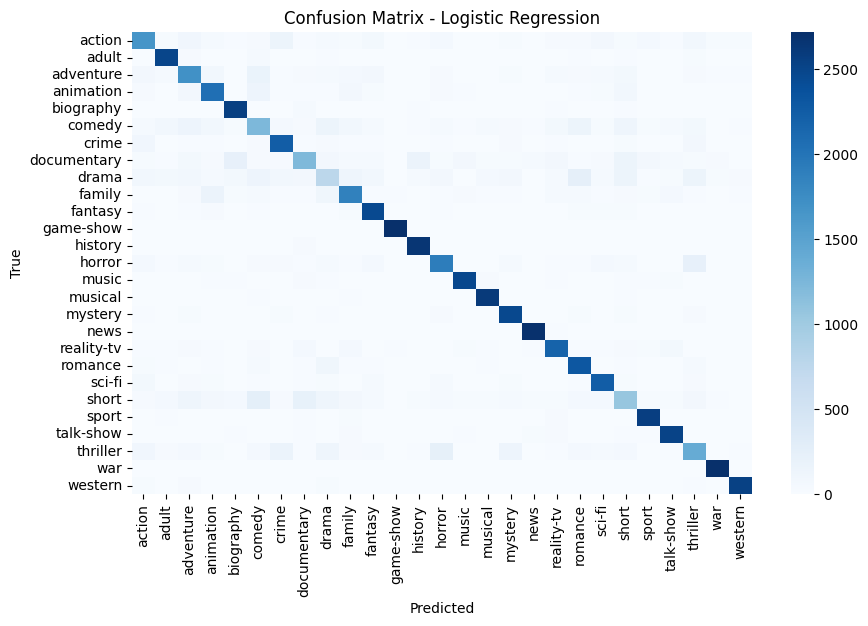


===== Naive Bayes (Validation Set) =====
Accuracy: 0.6513446967120567
Classification Report:
              precision    recall  f1-score   support

      action       0.52      0.49      0.50      2722
       adult       0.75      0.83      0.78      2723
   adventure       0.56      0.38      0.45      2723
   animation       0.65      0.60      0.62      2723
   biography       0.68      0.74      0.71      2723
      comedy       0.34      0.30      0.32      2723
       crime       0.66      0.64      0.65      2723
 documentary       0.44      0.43      0.43      2723
       drama       0.29      0.30      0.29      2722
      family       0.61      0.45      0.52      2722
     fantasy       0.64      0.69      0.67      2723
   game-show       0.94      0.94      0.94      2722
     history       0.75      0.80      0.77      2722
      horror       0.61      0.64      0.63      2722
       music       0.73      0.87      0.79      2723
     musical       0.79      0.68      0.

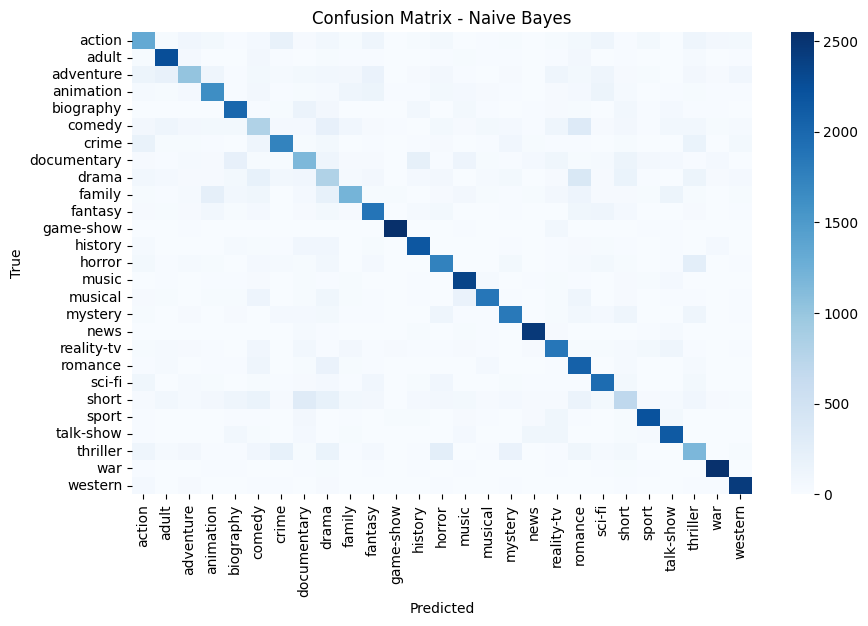


===== SVM (Linear) (Validation Set) =====
Accuracy: 0.7834745820353417
Classification Report:
              precision    recall  f1-score   support

      action       0.68      0.59      0.63      2722
       adult       0.83      0.95      0.89      2723
   adventure       0.63      0.66      0.64      2723
   animation       0.71      0.79      0.75      2723
   biography       0.83      0.97      0.90      2723
      comedy       0.55      0.36      0.44      2723
       crime       0.73      0.86      0.79      2723
 documentary       0.61      0.38      0.47      2723
       drama       0.40      0.16      0.23      2722
      family       0.70      0.70      0.70      2722
     fantasy       0.78      0.94      0.85      2723
   game-show       0.98      1.00      0.99      2722
     history       0.88      0.99      0.93      2722
      horror       0.68      0.71      0.70      2722
       music       0.88      0.94      0.91      2723
     musical       0.87      0.98      0

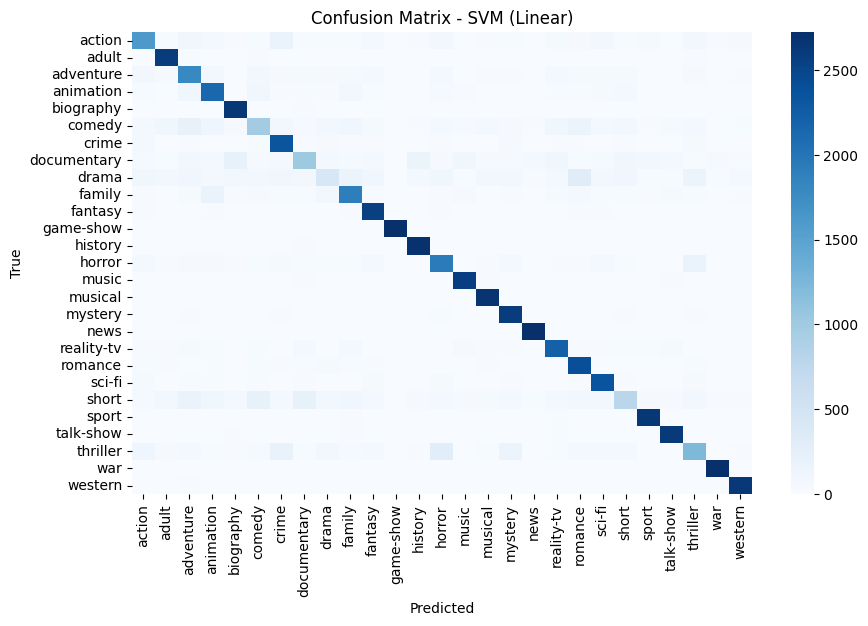

In [7]:
# Train and evaluate
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": MultinomialNB(),
    "SVM (Linear)": LinearSVC()
}

for name, model in models.items():
    print(f"\n===== {name} (Validation Set) =====")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    print("Accuracy:", accuracy_score(y_val, y_pred))
    print("Classification Report:")
    print(classification_report(y_val, y_pred, target_names=le.classes_))

    # Confusion matrix
    cm = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(10,6))
    sns.heatmap(cm, cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
